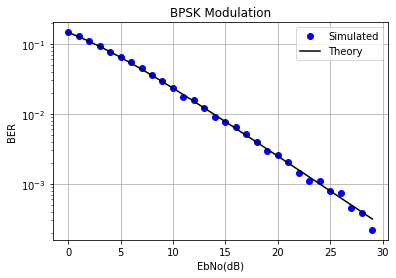

In [14]:
from numpy import sqrt, arange
import random
import matplotlib.pyplot as plt

N = 100000
EbNodB_range = arange(0, 30)
itr = len(EbNodB_range)
ber = [None]*itr
tx_symbol = 0
noise = 0
ch_coeff = 0
rx_symbol = 0
det_symbol = 0

for n in range(0, itr):

    EbNodB = EbNodB_range[n]
    EbNo = 10.0**(EbNodB/10.0)
    noise_std = 1/sqrt(2*EbNo)
    noise_mean = 0

    no_errors = 0
    for m in range(0, N):
      tx_symbol = 2*random.randint(0, 1)-1
      noise = random.gauss(noise_mean, noise_std)
      ch_coeff = sqrt(random.gauss(0, 1)**2+random.gauss(0, 1)**2)/sqrt(2)
      rx_symbol = tx_symbol*ch_coeff + noise
      det_symbol = 2 * (rx_symbol >= 0) - 1
      no_errors += 1*(tx_symbol != det_symbol)

    ber[n] = no_errors / N

BER_theory = 0.5*(1 - sqrt(10.0**(EbNodB_range/10.0) /
                  (1+10.0**(EbNodB_range/10.0))))

plt.plot(EbNodB_range, ber, 'bo')
plt.plot(EbNodB_range, BER_theory, 'k')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.legend(["Simulated", "Theory"])

plt.show()


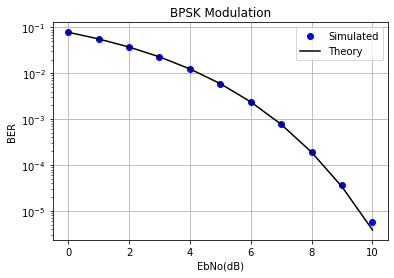

In [10]:
from numpy import sqrt, arange
from numpy.random import rand, randn
import matplotlib.pyplot as plt
from scipy.special import erfc

N = 5000000
EbNodB_range = arange(0, 11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range(0, itr):

    EbNodB = EbNodB_range[n]
    EbNo = 10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
BER_theory = 0.5*erfc(sqrt(10**(EbNodB_range/10)))
plt.plot(EbNodB_range, ber, 'bo')
plt.plot(EbNodB_range, BER_theory,'k')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.legend(["Simulated", "Theory"])
plt.show()
